In [1]:
from copy import deepcopy
from statistics import stdev
import matplotlib.pyplot as plt

In [2]:
def graph_progress(all_costs, all_accuracies, show_recents=True):
    # last 5 results
    # ---------------
    if show_recents:
        line1 = "cost: "
        line2 = "acc:  "
        for i in range(-5, 0):
            line1 += "{:>6} ".format(round(all_costs[i], 3))
            line2 += "{:>6}%".format(round(all_accuracies[i]*100, 2))
        print(line1)
        print(line2)


    # graphs
    # -------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    axes[0].plot(range(len(all_costs)), all_costs, label="costs")
    axes[0].set_xlabel('step') # Set the y axis label of the current axis.
    axes[0].set_ylabel('cost') # Set a title of the current axes.
    axes[0].set_title('cost over training steps') 
    axes[0].legend() # show a legend on the plot

    axes[1].plot(range(len(all_accuracies)), all_accuracies, label="accuracies")
    axes[1].set_xlabel('step') # Set the y axis label of the current axis.
    axes[1].set_ylabel('accuracy') # Set a title of the current axes.
    axes[1].set_title('accuracy over training steps') 
    axes[1].legend() # show a legend on the plot

    return fig.tight_layout()

# Import Starting Data

In [3]:
import pandas as pd #1
import os           #3

In [4]:
given_data_folder = 'data'

file_names = os.listdir(given_data_folder)
file_names.sort()
file_names

['.DS_Store',
 'MMasseyOrdinals.csv',
 'MRegularSeasonDetailedResults.csv',
 'bracket-2022.csv',
 'new']

In [5]:
reg_season_file_name = 'MRegularSeasonDetailedResults.csv'

In [6]:
file_path = given_data_folder + '/' + reg_season_file_name 
reg_season_df  = pd.read_csv(file_path)
print(len(reg_season_df))

reg_season_df.head(5)

100423


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [7]:
ranks_file_name = 'MMasseyOrdinals.csv'

In [8]:
file_path = given_data_folder + '/' + ranks_file_name 
ranks_df  = pd.read_csv(file_path)
print(len(ranks_df))

ranks_df.head(5)

4521720


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


# Cut both down to just the last X years

In [9]:
recent_season  = 2022

seasons = [2021, 2019, 2018, 2017]

In [10]:
recent_season_df = reg_season_df[reg_season_df.Season == recent_season]

for season in seasons:
    recent_season_df = pd.concat([recent_season_df, 
                                  reg_season_df[reg_season_df.Season == (season)]], ignore_index = True)
    recent_season_df.reset_index()
    
print(len(recent_season_df))
recent_season_df.head(5)

23854


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2022,8,1104,93,1256,64,H,0,32,64,...,26,6,19,14,20,11,10,3,1,18
1,2022,8,1105,82,1398,73,H,0,31,71,...,27,2,5,14,27,12,14,5,2,16
2,2022,8,1110,77,1265,73,H,1,27,59,...,19,7,12,10,26,5,15,6,3,20
3,2022,8,1112,81,1319,52,H,0,28,69,...,16,9,17,11,28,11,20,3,1,22
4,2022,8,1113,76,1339,60,H,0,31,66,...,24,10,11,2,22,10,21,9,1,14


In [11]:
recent_ranks_df = ranks_df[ranks_df.Season == recent_season]

for season in seasons:
    recent_ranks_df = pd.concat([recent_ranks_df, 
                                 ranks_df[ranks_df.Season == (season)]], ignore_index = True)
    recent_ranks_df.reset_index()
    
print(len(recent_ranks_df))
recent_ranks_df.head(5)

1336862


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2022,16,AP,1104,14
1,2022,16,AP,1116,16
2,2022,16,AP,1120,21
3,2022,16,AP,1124,9
4,2022,16,AP,1163,23


# Turn Both DFs into lists of columns

In [12]:
# Creates list of the column names from the df
columns = recent_season_df.columns.tolist()

# Creates list of the columns
recent_season_df_columns = []
for expected_column in columns:
    recent_season_df_columns.append( recent_season_df[expected_column].tolist() )

print("rows:", len(recent_season_df_columns[0]), "  columns:", len(recent_season_df_columns))

rows: 23854   columns: 34


In [13]:
# Creates list of the column names from the df
columns = recent_ranks_df.columns.tolist()

# Creates list of the columns
recent_ranks_df_columns = []
for expected_column in columns:
    recent_ranks_df_columns.append( recent_ranks_df[expected_column].tolist() )

print("rows:", len(recent_ranks_df_columns[0]), "  columns:", len(recent_ranks_df_columns))

rows: 1336862   columns: 5


# Combine team IDs and season years

In [14]:
# 0: Season, 2: WTeamID, 4: LTeamID
for i in range(len(recent_season_df_columns[0])):
    # WTeamID
    recent_season_df_columns[2][i] = "{}_{}".format(recent_season_df_columns[2][i], recent_season_df_columns[0][i])
    # LTeamID
    recent_season_df_columns[4][i] = "{}_{}".format(recent_season_df_columns[4][i], recent_season_df_columns[0][i])


In [15]:
# 0: Season, 3: TeamID
for i in range(len(recent_ranks_df_columns[0])):
    # TeamID
    recent_ranks_df_columns[3][i] = "{}_{}".format(recent_ranks_df_columns[3][i], recent_ranks_df_columns[0][i])
    

### create a ranks dictionary

In [16]:
ranks_dict = {}

# 0: Season, 1: RankingDayNum, 2: SystemName, 3: TeamID, 4: OrdinalRank
for i in range(len(recent_ranks_df_columns[0])):
    TeamID        = recent_ranks_df_columns[3][i]
    SystemName    = recent_ranks_df_columns[2][i]
    RankingDayNum = recent_ranks_df_columns[1][i]
    OrdinalRank   = recent_ranks_df_columns[4][i]
    
    # new team entry
    if TeamID not in ranks_dict:
        #                            day_num: [running average, [list of ranks]]
        ranks_dict[TeamID] = { RankingDayNum: [OrdinalRank, [[SystemName, OrdinalRank]]] }
        
    # existing team entry
    else:
        # new day entry
        if RankingDayNum not in ranks_dict[TeamID]:
            ranks_dict[TeamID][RankingDayNum] = [OrdinalRank, [[SystemName, OrdinalRank]]]
        
        # existing day entry
        else:
            current_sum = ranks_dict[TeamID][RankingDayNum][0] * len(ranks_dict[TeamID][RankingDayNum][1])
            new_sum     = current_sum + OrdinalRank
            new_average = new_sum / (len(ranks_dict[TeamID][RankingDayNum][1])+1)
            
            ranks_dict[TeamID][RankingDayNum][0] = new_average
            ranks_dict[TeamID][RankingDayNum][1].append([SystemName, OrdinalRank])


In [17]:
example_ID  = list(ranks_dict.keys())[0]
example_day = list(ranks_dict[example_ID].keys())[0]

print(example_ID)
ranks_dict[example_ID][example_day]

1104_2022


[12.380952380952381,
 [['AP', 14],
  ['BWE', 5],
  ['DES', 8],
  ['DII', 10],
  ['DOK', 12],
  ['EBP', 35],
  ['EMK', 16],
  ['HAS', 18],
  ['INC', 9],
  ['JNG', 8],
  ['MAS', 4],
  ['MOR', 30],
  ['PGH', 5],
  ['POM', 12],
  ['SAG', 12],
  ['SFX', 7],
  ['SMS', 12],
  ['TRK', 16],
  ['TRP', 8],
  ['USA', 13],
  ['WIL', 6]]]

### separate_fga_and_fgp

In [18]:
# get just the games from the specified season
# ---------------------------------------------
#given_df = df_columns

# change df to list of columns
# -----------------------------
#columns = given_df.columns.tolist()

# Creates list of the columns
#orig_columns = []
#for expected_column in columns:
    #temp = given_df[expected_column].tolist()
    #orig_columns.append(temp)

orig_columns = deepcopy(recent_season_df_columns)

#  0: Season      1: DayNum      2: WTeamID     3: WScore      4: LTeamID     5: LScore      6: WLoc      
#  7: NumOT       8: WFGM        9: WFGA       10: WFGM3      11: WFGA3      12: WFTM       13: WFTA      
# 14: WOR        15: WDR        16: WAst       17: WTO        18: WStl       19: WBlk       20: WPF       
# 21: LFGM       22: LFGA       23: LFGM3      24: LFGA3      25: LFTM       26: LFTA       27: LOR       
# 28: LDR        29: LAst       30: LTO        31: LStl       32: LBlk       33: LPF 


# cut down to just the relevent statistic columns
# ------------------------------------------------
number_columns = [deepcopy(orig_columns[3])] + deepcopy(orig_columns[ 8:21]) + [deepcopy(orig_columns[5])] + deepcopy(orig_columns[21:])

#  0: WScore      1: WFGM        2: WFGA        3: WFGM3       4: WFGA3       5: WFTM        6: WFTA      
#  7: WOR         8: WDR         9: WAst       10: WTO        11: WStl       12: WBlk       13: WPF
# 14: LScore     15: LFGM       16: LFGA       17: LFGM3      18: LFGA3      19: LFTM       20: LFTA
# 21: LOR        22: LDR        23: LAst       24: LTO        25: LStl       26: LBlk       27: LPF 


# customize the stats to my new preferences
# ------------------------------------------

# change FGM and FGA to not include FGM3 and FGA3
for i in range(len(number_columns[1])):
    number_columns[ 1][i] = number_columns[ 1][i]-number_columns[ 3][i] #  1: WFGM -  3: WFGM3
    number_columns[ 2][i] = number_columns[ 2][i]-number_columns[ 4][i] #  2: WFGA -  4: WFGA3

    number_columns[15][i] = number_columns[15][i]-number_columns[17][i] # 15: LFGM - 17: LFGM3
    number_columns[16][i] = number_columns[16][i]-number_columns[18][i] # 16: LFGA - 18: LFGA3

# change from FGM to FG%
for i in range(len(number_columns[1])):
    number_columns[ 1][i] = number_columns[ 1][i]/number_columns[ 2][i] #  1: WFGM2 /  2: WFGA2
    number_columns[ 3][i] = number_columns[ 3][i]/number_columns[ 4][i] #  3: WFGM3 /  4: WFGA3
    if number_columns[ 6][i] == 0: 
        number_columns[ 5][i] = 1.0
    else:
        number_columns[ 5][i] = number_columns[ 5][i]/number_columns[ 6][i] #  5: WFTM  /  6: WFTA

    number_columns[15][i] = number_columns[15][i]/number_columns[16][i] # 15: LFGM2 / 16: LFGA2
    number_columns[17][i] = number_columns[17][i]/number_columns[18][i] # 17: LFGM3 / 18: LFGA3
    if number_columns[20][i] == 0:
        number_columns[19][i] = 1.0
    else:
        number_columns[19][i] = number_columns[19][i]/number_columns[20][i] # 19: LFTM  / 20: LFTA

# get rid of points
number_columns.pop(14) # 14: LScore
number_columns.pop( 0) #  0: WScore


#  0: WFG%2       1: WFGA2       2: WFG%3       3: WFGA3       4: WFT%        5: WFTA      
#  6: WOR         7: WDR         8: WAst        9: WTO        10: WStl       11: WBlk       12: WPF
# 13: LFG%2      14: LFGA2      15: LFG%3      16: LFGA3      17: LFT%       18: LFTA
# 19: LOR        20: LDR        21: LAst       22: LTO        23: LStl       24: LBlk       25: LPF 

headers_list = [ "FG%2",  "FGA",  "FG%3",  "FGA3",  "FT%",  "FTA",  "OR",  "DR",  "Ast",  "TO",  "Stl",  "Blk",  "PF", 
                "xFG%2", "xFGA", "xFG%3", "xFGA3", "xFT%", "xFTA", "xOR", "xDR", "xAst", "xTO", "xStl", "xBlk", "xPF"]

# add back team IDSs
team_IDs = []
team_IDs.append(orig_columns[2]) # WTeam ID
team_IDs.append(orig_columns[4]) # LTeam ID


#number_columns, team_IDs, headers_list, season, print_report)

In [19]:
print(len(number_columns))
print(len(number_columns[0]))

26
23854


In [20]:
print(len(recent_season_df_columns))
print(len(recent_season_df_columns[0]))

34
23854


### put colums back into original shape

In [21]:
#number_columns
col_ids = [ 0, 1,  2, 3,  4, 5,
           13,14, 15,16, 17,18]

orig_ids = [ 8, 9, 10,11, 12,13,
            21,22, 23,24, 25,26]

current = 0
fgp_columns = []
for i in range(len(recent_season_df_columns)):
    if i in orig_ids:
        fgp_columns.append( number_columns[col_ids[current]].copy() )
        current += 1
    else:
        fgp_columns.append( recent_season_df_columns[i].copy() )

In [22]:
print(len(fgp_columns))
print(len(fgp_columns[0]))

34
23854


In [23]:
recent_season_df_columns = fgp_columns

### Add team ranks to data

In [24]:
# add columns for WTeam Rank and LTeam Rank
recent_season_df_columns.insert(21, []) # 21
recent_season_df_columns.append([])     # 35

In [25]:
num_rows = len(recent_season_df_columns[0])

for i in range(num_rows):
    DayNum = recent_season_df_columns[1][i]
    WTeam  = recent_season_df_columns[2][i]
    LTeam  = recent_season_df_columns[4][i]
    
    # Look up the most recent ranking for WTeam and LTeam
    
    # WTeam
    # ------
    WTeam_ranks = list(ranks_dict[WTeam].keys())
    WTeam_ranks.sort()
    
    recent_W_key = WTeam_ranks[0]
    for key in WTeam_ranks:
        # once the key we are on is bigger than the day of the game, take the previous key
        if key > recent_W_key:
            # add the WTeam Rank to the dict
            recent_season_df_columns[21].append( ranks_dict[WTeam][recent_W_key][0] )
            break
            
    # LTeam
    # ------
    LTeam_ranks = list(ranks_dict[LTeam].keys())
    LTeam_ranks.sort()
    
    recent_L_key = LTeam_ranks[0]
    for key in LTeam_ranks:
        # once the key we are on is bigger than the day of the game, take the previous key
        if key > recent_L_key:
            # add the LTeam Rank to the dict
            recent_season_df_columns[35].append( ranks_dict[LTeam][recent_L_key][0] )
            break
    

In [26]:
#for i in range(len(recent_season_df_columns)):
    #print( "{:>3} - {:>5}".format(i, len(recent_season_df_columns[i])))

# Create Inputs and Solutions 

In [27]:
'''
normalized_indicis = [  3,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 
                        5, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
''';

In [28]:
df_columns = deepcopy(recent_season_df_columns)

### Normalizing each input stat to 0-1 and getting variance
### -------------------------------------------------------------------

In [29]:
# Normalizing each input stat to 0-1
# -----------------------------------

# create columns of all actual data
stats_columns = [df_columns[3].copy()] + deepcopy(df_columns[  8:22 ])
additional    = [df_columns[5].copy()] + deepcopy(df_columns[ 22:   ])

for i in range(len(stats_columns)):
    stats_columns[i] += additional[i]


# getting averages/standard devation
column_averages = []
column_std = []
for column in stats_columns:
    column_std.append(stdev(column))
    column_averages.append( sum(column)/len(column) )


# get valid max candidates
within_range = []
for i in range(len(stats_columns)):
    within_range_column = []
    for value in stats_columns[i]:
        if value < (column_averages[i] + (column_std[i]*2.5)) and value > (column_averages[i] - (column_std[i]*2.5)):
            within_range_column.append(value)
    within_range.append(within_range_column)


# now create max columns list for use
max_columns = []
for i in range(len(within_range)):
    max_columns.append( max(within_range[i]) )
max_columns += max_columns


# normalize all values
normalized_indicis = [3,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 
                      5, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
for i in range(len(normalized_indicis)):
    column_max  = max_columns[i]
    column      = normalized_indicis[i]
    for i in range(len( df_columns[column] )):
        df_columns[column][i] = (df_columns[column][i]/column_max)


# create list of normalized variance values
variance = []
for i in range(len(column_std)):
    variance.append( (column_std[i]/max_columns[i])**2 )
variance += variance


# return max columns and variance lists
output_max_columns  = max_columns.copy()
output_variance     = variance.copy()


In [30]:
# change df to list of rows
# --------------------------

# Make a list of rows too
df_rows = []
for i in range(len(df_columns[0])):
    new_row = []
    for j in range(len(df_columns)):
        new_row.append(df_columns[j][i])
    df_rows.append(new_row)



# game solutions and team dictionary
# -----------------------------------

# inputs and solutions
inputs      = []
solutions   = []


# team1 ID, team2 ID, team1 win? (1 or 0)
game_solutions = []


# key = teamID
# value = [count, team]
team_dictionary = {}


for i in range(len(df_rows)):
    row = df_rows[i]

    WTeam_stats = [row[3]] + row[ 8:22].copy()
    LTeam_stats = [row[5]] + row[22:  ].copy()


    # if both teams are in the team dictionary, create input and solution rows
    # -------------------------------------------------------------------------
    if row[2] in team_dictionary and row[4] in team_dictionary:


        new_input_row_1 = team_dictionary[row[2]][1].copy() + team_dictionary[row[4]][2].copy()
        new_input_row_2 = team_dictionary[row[4]][1].copy() + team_dictionary[row[2]][2].copy()

        orig_length = len(new_input_row_1)
        for j in range(len(new_input_row_1)):
            new_input_row_1.append(-new_input_row_2[j])
            new_input_row_2.append(-new_input_row_1[j])


        WTeam_inputs = team_dictionary[row[2]][1].copy() + team_dictionary[row[2]][2].copy()
        LTeam_inputs = team_dictionary[row[4]][1].copy() + team_dictionary[row[4]][2].copy()

        # for solutions
        new_solutions_row_1 = []
        new_solutions_row_2 = []

        # for updating dictionaries
        W_games = team_dictionary[row[2]][0]
        L_games = team_dictionary[row[4]][0]

        # 26 long
        for j in range(len(WTeam_inputs)):
            # team FOR is positive
            if j < (len(WTeam_inputs)//2): # half

                # input and solution rows
                # ------------------------
                new_solutions_row_1.append(WTeam_stats[j])
                new_solutions_row_2.append(LTeam_stats[j])

                # Update team dictionaries
                # -------------------------
                # WTeam
                team_dictionary[row[2]][1][j] = ((W_games * team_dictionary[row[2]][1][j]) + WTeam_stats[j])/(W_games+1)
                team_dictionary[row[2]][2][j] = ((W_games * team_dictionary[row[2]][2][j]) + LTeam_stats[j])/(W_games+1)

                # LTeam
                team_dictionary[row[4]][1][j] = ((L_games * team_dictionary[row[4]][1][j]) + LTeam_stats[j])/(L_games+1)
                team_dictionary[row[4]][2][j] = ((L_games * team_dictionary[row[4]][2][j]) + WTeam_stats[j])/(L_games+1)

            # team AGAINST is positive
            else:
                # input and solution rows
                # ------------------------
                new_solutions_row_1.append(-LTeam_stats[j-(len(WTeam_inputs)//2)])
                new_solutions_row_2.append(-WTeam_stats[j-(len(WTeam_inputs)//2)])


        # update game count of both teams
        team_dictionary[row[2]][0] += 1
        team_dictionary[row[4]][0] += 1


        # append new inputs and solutions to overall list
        # ------------------------------------------------
        inputs.append(new_input_row_1)
        inputs.append(new_input_row_2)

        solutions.append(new_solutions_row_1)
        solutions.append(new_solutions_row_2)




    # if both teams are not in the dictionary already then just add/update them
    # --------------------------------------------------------------------------
    # create LTeam entry, update WTeam entry
    elif row[2] in team_dictionary:
        # LTeam
        team_dictionary[row[4]] = [1, WTeam_stats, LTeam_stats]

        # WTeam
        W_games = team_dictionary[row[2]][0]
        for j in range(len(WTeam_stats)):
            team_dictionary[row[2]][1][j] = ((W_games * team_dictionary[row[2]][1][j]) + WTeam_stats[j])/(W_games+1)
            team_dictionary[row[2]][2][j] = ((W_games * team_dictionary[row[2]][2][j]) + LTeam_stats[j])/(W_games+1)
        team_dictionary[row[2]][0] += 1


    # create WTeam entry, update LTeam entry
    elif row[4] in team_dictionary:
        # WTeam
        team_dictionary[row[2]] = [1, LTeam_stats, WTeam_stats]

        # LTeam
        L_games = team_dictionary[row[4]][0]
        for j in range(len(LTeam_stats)):
            team_dictionary[row[4]][1][j] = ((L_games * team_dictionary[row[4]][1][j]) + LTeam_stats[j])/(L_games+1)
            team_dictionary[row[4]][2][j] = ((L_games * team_dictionary[row[4]][2][j]) + WTeam_stats[j])/(L_games+1)
        team_dictionary[row[4]][0] += 1


    # create entry for both WTeam and LTeam
    else:
        team_dictionary[row[2]] = [1, WTeam_stats, LTeam_stats]
        team_dictionary[row[4]] = [1, LTeam_stats, WTeam_stats]






## using final team dictionary entries, create input data for final solutions

In [31]:
final_inputs = []


#### print report

In [32]:
# print report
# -------------
headers_list = ["Pts", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", 
                "DR", "Ast", "TO", "Stl", "Blk", "PF", "Str", 
                "xPts", "xFGM", "xFGA", "xFGM3", "xFGA3", "xFTM", "xFTA", "xOR",
                "xDR", "xAst", "xTO", "xStl", "xBlk", "xPF", "xStr"]

print(len(inputs), len(solutions))

line1 = ""
line2 = ""
for i in range(len(output_variance)//2):
    line1 += "{:>6} ".format(headers_list[i])
    line2 += "{:>6}%".format( round(output_variance[i]*100, 2) )
print(line1)
print(line2)


# return inputs, solutions, output_max_columns, output_variance

45516 45516
   Pts    FGM    FGA   FGM3   FGA3    FTM    FTA     OR     DR    Ast     TO    Stl    Blk     PF    Str 
  1.47%  1.67%  1.81%  3.14%  2.78%   1.6%  4.04%  4.31%  1.93%  3.41%  3.29%  4.77%  7.63%  4.58%  7.59%


# Remove the Strength stat from the solutions

In [33]:
headers_list = ["Pts", "FG%2", "FGA2", "FG%3", "FGA3", "FT%", "FTA", "OR", 
                "DR", "Ast", "TO", "Stl", "Blk", "PF", "Str", 
                "xPts", "xFG%2", "xFGA2", "xFG%3", "xFGA3", "xFT%", "xFTA", "xOR",
                "xDR", "xAst", "xTO", "xStl", "xBlk", "xPF", "xStr"]
solutions0 = inputs[1]
#solutions0 = solutions[0]


lines = ["","","",""]
for i in range(len(headers_list)):
    if i < len(headers_list)//2:
        lines[0] += "{:>5}  ".format(headers_list[i])
        lines[1] += "{:>5.2}  ".format(solutions0[i])
    else:
        lines[2] += "{:>5}  ".format(headers_list[i])
        lines[3] += "{:>5.2}  ".format(solutions0[i])
        
for line in lines:
    print(line)
        

  Pts   FG%2   FGA2   FG%3   FGA3    FT%    FTA     OR     DR    Ast     TO    Stl    Blk     PF    Str  
 0.72   0.68   0.48   0.57   0.56   0.72   0.95   0.32   0.54   0.25    1.1   0.85   0.12   0.79   0.85  
 xPts  xFG%2  xFGA2  xFG%3  xFGA3   xFT%   xFTA    xOR    xDR   xAst    xTO   xStl   xBlk    xPF   xStr  
 0.75   0.62   0.69   0.46   0.97   0.87   0.39   0.53   0.54   0.38   0.45   0.69   0.38   0.36   0.98  


# try it out

In [34]:
import sys
sys.path.append("..")

In [35]:
from network_matrix.population_v3 import Population
import numpy as np

#### both positive + with points

In [36]:
# to get new solutions, use the points (0,15)
new_solutions = []
for row in solutions:
    if abs(row[0]) > abs(row[15]): new_solutions.append([ 1])
    else:                          new_solutions.append([-1])

In [37]:
split = 7000
np_inputs        = np.array(inputs[:split])
np_new_solutions = np.array(new_solutions[:split])

#np_inputs        = np.array(inputs)
#np_new_solutions = np.array(new_solutions)

np_data = [np_inputs, np_new_solutions]

In [38]:
print(len(np_inputs[0]))
print(len(np_new_solutions[0]))

60
1


#### create and test popultaion

In [39]:
'''
learning_rate, steps, batch_size,    cost,      acc,
-------------- ------ ----------- -------- ---------
      0.00001,   500,          2,   0.207,   67.26%,
       
''';

In [40]:
TEST_population  = Population(60, 1, learning_rate=0.0001)

all_times = [0,0,0,0,0]
all_costs = []
all_accuracies = []

In [56]:
# training loops
# ---------------
#times, costs, accuracies = TEST_population.train_and_test(np_data, 6_000)
times, costs, accuracies = TEST_population.train_and_test_stochastic(np_data, 150, batch_size=2)

# update tracking
# ---------------
for i in range(len(all_times)):
    all_times[i] += times[i]
all_costs      += costs
all_accuracies += accuracies

Training Progress:                             |  cost     acc  |     steps           time      remaining  
                                               | ------  ------ | ----------  -------------  ------------- 


 
             time(s)   percent  per step       | steps:              150
            --------  --------  --------       | learning rate:   0.0001
calc value    121.19     22.25%     0.81       | # connections:    43802
grad dscnt    314.14     57.67%     2.09       | L1 (sum):        0.0014
scoring        30.01      5.51%      0.2       | L2 (**2):         0.003
step time     544.73     100.0%     3.63

cost:  0.205  0.205  0.205  0.205  0.205 
acc:   67.73% 67.74% 67.76% 67.74% 67.74%
cost:  0.205  0.205  0.205  0.205  0.205 
acc:   67.73% 67.74% 67.76% 67.74% 67.74%


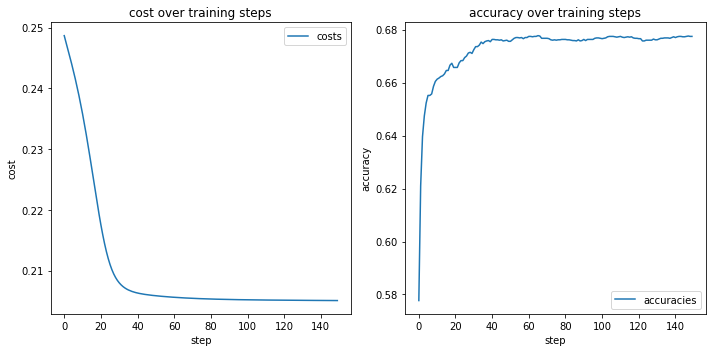

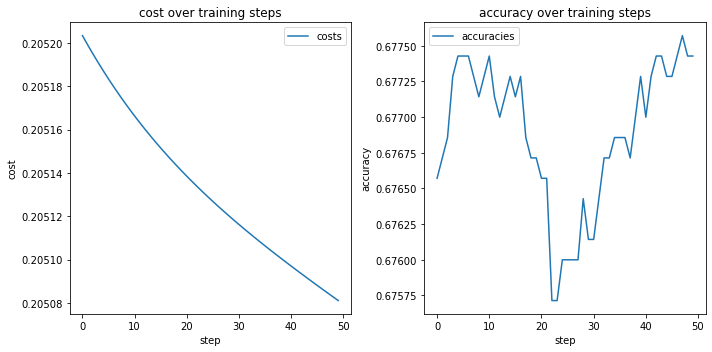

In [55]:
TEST_population.report_training_progress(all_times)     # timing
graph_progress(all_costs, all_accuracies)               # graphs
graph_progress(all_costs[100:], all_accuracies[100:], show_recents=True) # graphs (recent)

In [51]:
TEST_population.print_magnitudes_report()


           abs_avg   abs_med       sum       max       min
          --------  --------  --------  --------  --------
values        0.43     0.446   -73.852     0.601    -0.821
biases       0.152     0.154   -27.587     0.007    -0.259
weights      0.052     0.034   -10.876     0.362     -0.43
          --------  --------  --------  --------  --------
values       0.265     0.239   -39.084     0.363     -0.66
biases       0.057     0.061   -10.274     0.012    -0.154
weights       0.03      0.02     37.08     0.276    -0.262
          --------  --------  --------  --------  --------
values       0.095     0.095     0.095     0.095     0.095
biases       0.088     0.088    -0.088    -0.088    -0.088
weights      0.091     0.071    -0.509     0.345    -0.298


In [44]:
test1 = np.array([[1,2,3],
                  [4,5,6]])

test2 = np.array([0,1])

test3 = np.sum(test2[:, None] * test1, axis=0)

print(test2.shape, test1.shape)
print(test3.shape, '\n')

print(test3)

(2,) (2, 3)
(3,) 

[4 5 6]


In [45]:
test1 = np.array([[1,2,3],
                  [4,5,6]])

test2 = np.array([0,1])

test4 = np.swapaxes(test1, 0, 1)
test5 = np.multiply(test2, test4)
test3 = np.sum(test5, axis=1)

print(test2.shape, test1.shape)
print(test3.shape, '\n')

print(test3)

(2,) (2, 3)
(3,) 

[4 5 6]


In [46]:
'''
def separate_fga_and_fgp(stats_df, season, print_report=False):
    # get just the games from the specified season
    # ---------------------------------------------
    given_df = stats_df[stats_df.Season == season]

    # change df to list of columns
    # -----------------------------
    columns = given_df.columns.tolist()

    # Creates list of the columns
    orig_columns = []
    for expected_column in columns:
        temp = given_df[expected_column].tolist()
        orig_columns.append(temp)

    #  0: Season      1: DayNum      2: WTeamID     3: WScore      4: LTeamID     5: LScore      6: WLoc      
    #  7: NumOT       8: WFGM        9: WFGA       10: WFGM3      11: WFGA3      12: WFTM       13: WFTA      
    # 14: WOR        15: WDR        16: WAst       17: WTO        18: WStl       19: WBlk       20: WPF       
    # 21: LFGM       22: LFGA       23: LFGM3      24: LFGA3      25: LFTM       26: LFTA       27: LOR       
    # 28: LDR        29: LAst       30: LTO        31: LStl       32: LBlk       33: LPF 


    # cut down to just the relevent statistic columns
    # ------------------------------------------------
    number_columns = [deepcopy(orig_columns[3])] + deepcopy(orig_columns[ 8:21]) + [deepcopy(orig_columns[5])] + deepcopy(orig_columns[21:])

    #  0: WScore      1: WFGM        2: WFGA        3: WFGM3       4: WFGA3       5: WFTM        6: WFTA      
    #  7: WOR         8: WDR         9: WAst       10: WTO        11: WStl       12: WBlk       13: WPF
    # 14: LScore     15: LFGM       16: LFGA       17: LFGM3      18: LFGA3      19: LFTM       20: LFTA
    # 21: LOR        22: LDR        23: LAst       24: LTO        25: LStl       26: LBlk       27: LPF 


    # customize the stats to my new preferences
    # ------------------------------------------

    # change FGM and FGA to not include FGM3 and FGA3
    for i in range(len(number_columns[1])):
        number_columns[ 1][i] = number_columns[ 1][i]-number_columns[ 3][i] #  1: WFGM -  3: WFGM3
        number_columns[ 2][i] = number_columns[ 2][i]-number_columns[ 4][i] #  2: WFGA -  4: WFGA3

        number_columns[15][i] = number_columns[15][i]-number_columns[17][i] # 15: LFGM - 17: LFGM3
        number_columns[16][i] = number_columns[16][i]-number_columns[18][i] # 16: LFGA - 18: LFGA3

    # change from FGM to FG%
    for i in range(len(number_columns[1])):
        number_columns[ 1][i] = number_columns[ 1][i]/number_columns[ 2][i] #  1: WFGM2 /  2: WFGA2
        number_columns[ 3][i] = number_columns[ 3][i]/number_columns[ 4][i] #  3: WFGM3 /  4: WFGA3
        if number_columns[ 6][i] == 0: 
            number_columns[ 5][i] = 1.0
        else:
            number_columns[ 5][i] = number_columns[ 5][i]/number_columns[ 6][i] #  5: WFTM  /  6: WFTA

        number_columns[15][i] = number_columns[15][i]/number_columns[16][i] # 15: LFGM2 / 16: LFGA2
        number_columns[17][i] = number_columns[17][i]/number_columns[18][i] # 17: LFGM3 / 18: LFGA3
        if number_columns[20][i] == 0:
            number_columns[19][i] = 1.0
        else:
            number_columns[19][i] = number_columns[19][i]/number_columns[20][i] # 19: LFTM  / 20: LFTA

    # get rid of points
    number_columns.pop(14) # 14: LScore
    number_columns.pop( 0) #  0: WScore


    #  0: WFG%2       1: WFGA2       2: WFG%3       3: WFGA3       4: WFT%        5: WFTA      
    #  6: WOR         7: WDR         8: WAst        9: WTO        10: WStl       11: WBlk       12: WPF
    # 13: LFG%2      14: LFGA2      15: LFG%3      16: LFGA3      17: LFT%       18: LFTA
    # 19: LOR        20: LDR        21: LAst       22: LTO        23: LStl       24: LBlk       25: LPF 

    headers_list = [ "FG%2",  "FGA",  "FG%3",  "FGA3",  "FT%",  "FTA",  "OR",  "DR",  "Ast",  "TO",  "Stl",  "Blk",  "PF", 
                    "xFG%2", "xFGA", "xFG%3", "xFGA3", "xFT%", "xFTA", "xOR", "xDR", "xAst", "xTO", "xStl", "xBlk", "xPF"]

    # add back team IDSs
    team_IDs = []
    team_IDs.append(orig_columns[2]) # WTeam ID
    team_IDs.append(orig_columns[4]) # LTeam ID


    return inputs_outputs_for_season(number_columns, team_IDs, headers_list, season, print_report)
''';

In [47]:
'''
def inputs_outputs_for_season(input_columns, team_IDs, headers_list, season, print_report=False):

    # get just the games from the specified season
    # change df to list of columns
    # ---------------------------------------------
    df_columns = input_columns


    # Normalizing each input stat to 0-1
    # -----------------------------------

    # create columns of all actual data
    split = int(len(df_columns)//2)
    stats_columns = deepcopy(df_columns[     :split])
    additional    = deepcopy(df_columns[split:     ])

    for i in range(len(stats_columns)):
        stats_columns[i] += additional[i]


    # getting averages/standard devation
    column_averages = []
    column_std = []
    for column in stats_columns:
        column_std.append(stdev(column))
        column_averages.append( sum(column)/len(column) )


    # get valid max candidates
    within_range = []
    for i in range(len(stats_columns)):
        within_range_column = []
        for value in stats_columns[i]:
            if value < (column_averages[i] + (column_std[i]*2.5)) and value > (column_averages[i] - (column_std[i]*2.5)):
                within_range_column.append(value)
        within_range.append(within_range_column)


    # now create max columns list for use
    max_columns = []
    for i in range(len(within_range)):
        max_columns.append( max(within_range[i]) )
    max_columns += max_columns


    # normalize all values
    for i in range(len(df_columns)):
        column_max  = max_columns[i]
        #print(i, column_max)
        for j in range(len( df_columns[i] )):
            df_columns[i][j] = (df_columns[i][j]/column_max)


    # create list of normalized variance values
    variance = []
    for i in range(len(column_std)):
        variance.append( (column_std[i]/max_columns[i])**2 )
    variance += variance


    # return max columns and variance lists
    output_max_columns  = max_columns.copy()
    output_variance     = variance.copy()





    # change df to list of rows
    # --------------------------
    # Make a list of rows too
    df_rows = []
    for i in range(len(df_columns[0])):
        new_row = []
        for j in range(len(df_columns)):
            new_row.append(df_columns[j][i])
        df_rows.append(new_row)




    # game solutions and team dictionary
    # -----------------------------------

    # inputs and solutions
    inputs      = []
    solutions   = []


    # team1 ID, team2 ID, team1 win? (1 or 0)
    game_solutions = []


    # key = teamID
    # value = [count, team]
    team_dictionary = {}


    for i in range(len(df_rows)):
        row    = df_rows[i]
        id_row = [team_IDs[0][i], team_IDs[1][i]]

        #WTeam_stats = [row[3]] + row[ 8:21].copy()
        #LTeam_stats = [row[5]] + row[21:  ].copy()

        split = int(len(row)//2)
        WTeam_stats = row[     :split].copy()
        LTeam_stats = row[split:  ].copy()



        # if both teams are in the team dictionary, create input and solution rows
        # -------------------------------------------------------------------------
        if id_row[0] in team_dictionary and id_row[1] in team_dictionary:


            new_input_row_1 = team_dictionary[id_row[0]][1].copy() + team_dictionary[id_row[1]][2].copy()
            new_input_row_2 = team_dictionary[id_row[1]][1].copy() + team_dictionary[id_row[0]][2].copy()

            orig_length = len(new_input_row_1)
            for j in range(len(new_input_row_1)):
                new_input_row_1.append(-new_input_row_2[j])
                new_input_row_2.append(-new_input_row_1[j])


            # for inputs
            #new_input_row_1     = []
            #new_input_row_2     = []

            WTeam_inputs = team_dictionary[id_row[0]][1].copy() + team_dictionary[id_row[0]][2].copy()
            LTeam_inputs = team_dictionary[id_row[1]][1].copy() + team_dictionary[id_row[1]][2].copy()

            # for solutions
            new_solutions_row_1 = []
            new_solutions_row_2 = []

            # for updating dictionaries
            W_games = team_dictionary[id_row[0]][0]
            L_games = team_dictionary[id_row[1]][0]

            # 26 long
            for j in range(len(WTeam_inputs)):
                # team FOR is positive
                if j < (len(WTeam_inputs)//2): # half

                    # input and solution rows
                    # ------------------------
                    #new_input_row_1.append(  WTeam_inputs[j]-LTeam_inputs[j] )
                    #new_input_row_2.append( -WTeam_inputs[j]+LTeam_inputs[j] )

                    new_solutions_row_1.append(WTeam_stats[j])
                    new_solutions_row_2.append(LTeam_stats[j])

                    # Update team dictionaries
                    # -------------------------
                    # WTeam
                    team_dictionary[id_row[0]][1][j] = ((W_games * team_dictionary[id_row[0]][1][j]) + WTeam_stats[j])/(W_games+1)
                    team_dictionary[id_row[0]][2][j] = ((W_games * team_dictionary[id_row[0]][2][j]) + LTeam_stats[j])/(W_games+1)

                    # LTeam
                    team_dictionary[id_row[1]][1][j] = ((L_games * team_dictionary[id_row[1]][1][j]) + LTeam_stats[j])/(L_games+1)
                    team_dictionary[id_row[1]][2][j] = ((L_games * team_dictionary[id_row[1]][2][j]) + WTeam_stats[j])/(L_games+1)

                # team AGAINST is positive
                else:
                    # input and solution rows
                    # ------------------------
                    #new_input_row_1.append( -WTeam_inputs[j]+LTeam_inputs[j] )
                    #new_input_row_2.append(  WTeam_inputs[j]-LTeam_inputs[j] )

                    new_solutions_row_1.append(-LTeam_stats[j-(len(WTeam_inputs)//2)])
                    new_solutions_row_2.append(-WTeam_stats[j-(len(WTeam_inputs)//2)])


            # update game count of both teams
            team_dictionary[id_row[0]][0] += 1
            team_dictionary[id_row[1]][0] += 1


            # append new inputs and solutions to overall list
            # ------------------------------------------------
            inputs.append(new_input_row_1)
            inputs.append(new_input_row_2)


            # add scores onto the end of the solutions
            #for_1 =  2*new_solutions_row_1[ 0]*new_solutions_row_1[ 1] +  3*new_solutions_row_1[ 2]*new_solutions_row_1[ 3] +    new_solutions_row_1[ 4]*new_solutions_row_1[ 5]
            #aga_1 = -2*new_solutions_row_1[13]*new_solutions_row_1[14] + -3*new_solutions_row_1[15]*new_solutions_row_1[16] + -1*new_solutions_row_1[17]*new_solutions_row_1[18]
            #new_solutions_row_1.append(for_1)
            #new_solutions_row_1.append(aga_1)

            #for_2 =  2*new_solutions_row_2[ 0]*new_solutions_row_2[ 1] +  3*new_solutions_row_2[ 2]*new_solutions_row_2[ 3] +    new_solutions_row_2[ 4]*new_solutions_row_2[ 5]
            #aga_2 = -2*new_solutions_row_2[13]*new_solutions_row_2[14] + -3*new_solutions_row_2[15]*new_solutions_row_2[16] + -1*new_solutions_row_2[17]*new_solutions_row_2[18]
            #new_solutions_row_2.append(for_2)
            #new_solutions_row_2.append(aga_2)

            solutions.append(new_solutions_row_1)
            solutions.append(new_solutions_row_2)



        # if both teams are not in the dictionary already then just add/update them
        # --------------------------------------------------------------------------
        # create LTeam entry, update WTeam entry
        elif id_row[0] in team_dictionary:
            # LTeam
            team_dictionary[id_row[1]] = [1, WTeam_stats, LTeam_stats]

            # WTeam
            W_games = team_dictionary[id_row[0]][0]
            for j in range(len(WTeam_stats)):
                team_dictionary[id_row[0]][1][j] = ((W_games * team_dictionary[id_row[0]][1][j]) + WTeam_stats[j])/(W_games+1)
                team_dictionary[id_row[0]][2][j] = ((W_games * team_dictionary[id_row[0]][2][j]) + LTeam_stats[j])/(W_games+1)
            team_dictionary[id_row[0]][0] += 1


        # create WTeam entry, update LTeam entry
        elif id_row[1] in team_dictionary:
            # WTeam
            team_dictionary[id_row[0]] = [1, LTeam_stats, WTeam_stats]

            # LTeam
            L_games = team_dictionary[id_row[1]][0]
            for j in range(len(LTeam_stats)):
                team_dictionary[id_row[1]][1][j] = ((L_games * team_dictionary[id_row[1]][1][j]) + LTeam_stats[j])/(L_games+1)
                team_dictionary[id_row[1]][2][j] = ((L_games * team_dictionary[id_row[1]][2][j]) + WTeam_stats[j])/(L_games+1)
            team_dictionary[id_row[1]][0] += 1


        # create entry for both WTeam and LTeam
        else:
            team_dictionary[id_row[0]] = [1, WTeam_stats, LTeam_stats]
            team_dictionary[id_row[1]] = [1, LTeam_stats, WTeam_stats]




    # after this loop i have:
    # * inputs and solutions for the given year




    # headers list
    # -------------
    headers_list0 = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", 
                      "DR", "Ast",   "TO",  "Stl", "Blk",  "PF"         ]

    headers_list1 = ["xFGM", "xFGA", "xFGM3", "xFGA3", "xFTM", "xFTA", "xOR", 
                      "xDR", "xAst",   "xTO",  "xStl", "xBlk",  "xPF"        ]


    # print report
    # -------------

    print(len(inputs), len(solutions))

    line1 = ""
    line2 = ""
    line3 = ""
    for i in range(len(output_variance)//2):
        line1 += "{:>6} ".format(headers_list[i])
        line2 += "{:>6} ".format( round(inputs[0][i], 2) )
    line3 += "{:>6}%".format( round(output_variance[i]*100, 2) )
    print(line1)
    print(line2)
    print(line3)


    return inputs, solutions, output_max_columns, output_variance
    
''';

In [48]:
#print(ranks_dict["SEL"])